# Predicting an individual's income based on the identified factors through visualization

## Introduction and General Information

* A certain corporation is using the income data supplied by the United States Census Bureau to develop the marketing profiles of people. The role of the corporation is to help universities to develop marketing strategies for their degree programs in a manner to boost their enrolments.

* There are many factors affecting the individual's income like age, gender, education status, marital status, occupation etc. 

* The data analysts of the corporation will analyze these factors and identify the most useful factors affecting an individual's income. 

* These identified factors will then be used to develop strategies for targeting certain group of people. For the purpose of this project, $50k has been considered the key income for analyzing these factors. 

## Objectives

* Creating useful visualization based on the census income data and analyzing these visualizations to identify the most important factors contributing to an individual’s income.

* Implementing various machine learning algorithms based on the identified factors to predict an individual's income by splitting the given dataset into train and test set.

## Data Used
(Data Source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)

* This data has been extracted from census bureau database @ http://www.census.gov/ftp/pub/DES/www/welcome.html
* The database consists of 14 attributes such as age, gender, education status, marital status, occupation etc. which may affect the individual's income. 
* The entire database is divided in two class labels - >50K and <=50K income group.

## Approach and Methodology

* Convert the given dataset into pandas dataframe and then clean the dataframe to remove the missing values.
* Encode the class label and few categorical attributes to numbers as machine learning classification models only accept numerical values.
* Create and Analyze Bivariate Visualizations of each of the 14 attributes against the class label, Salary using various visualization techniques.
* Identify useful attributes for income prediction. 
* Predict individual's income using classification models such as K-Nearest Neighbours, Logistic Regression, Decision Tree, Naive Bayes, Random Forest and Neural Networks based on the attributes identified above.
* Compare the performance of these classification models.

## 1. Data pre-processing

### 1.1 Importing Libraries

In [3]:
# Libraries for data processing
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder

# Libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot 
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from seaborn import axes_style
sns.set(context='notebook', style='dark', palette='colorblind', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

# Libraries for building classification models
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')


### 1.2 Loading the data into Pandas data frame

* A pandas dataframe is created from the given data
* Column names were available in a different document so add them to the dataframe seperately.

In [4]:
# Loading data into pandas dataframe
column_names = ["Age", "Workclass", "final_weight", "Education", "education_num", "marital_status", "Occupation", "Relationship", "Race", "Sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "Salary"]
adults_data_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None, sep=", ")
adults_data_df.columns = column_names

print("Dataframe size before data cleaning is {}".format(adults_data_df.shape))

Dataframe size before data cleaning is (32561, 15)


In [5]:
adults_data_df.head()

,Age,Workclass,final_weight,Education,education_num,marital_status,Occupation,Relationship,Race,Sex,capital_gain,capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.3 Data Cleaning

* Upon exploring the dataset, it is observed that there were certain data marked with '?'. 
* Examine the data frame for the missing values and the remove the rows containing the missing values.

In [6]:
adults_data_df.isin(['?']).sum(axis = 0)

Age                  0
Workclass         1836
final_weight         0
Education            0
education_num        0
marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
Salary               0
dtype: int64

There are 4262 missing values which needs to be removed. 

In [7]:
# Removing the rows with '?'
for name in column_names:
    adults_data_df.drop(adults_data_df[adults_data_df[name] == '?'].index, inplace = True) 

In [8]:
adults_data_df.isnull().sum()

Age               0
Workclass         0
final_weight      0
Education         0
education_num     0
marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Salary            0
dtype: int64

We can see that there are no null values in this data set. 

### 1.4 Encoding Categorical Labels

In [9]:
# Method to encode categories into numerical values using label encoder and saving it as a new dataframe:
adults_data_df_new = adults_data_df.copy()

def cat_to_num_label_conversion(df):
    le = LabelEncoder()
    category_label_list = ["Workclass", "Education", "marital_status", "Occupation", "Relationship", "Race", "Sex", "native_country", "Salary"]
    for label in category_label_list:
        df[label] = le.fit_transform(df[label])
    
    return df

In [10]:
adults_data_cat_to_num_df = cat_to_num_label_conversion(adults_data_df_new)
adults_data_cat_to_num_df

,Age,Workclass,final_weight,Education,education_num,marital_status,Occupation,Relationship,Race,Sex,capital_gain,capital_loss,hours_per_week,native_country,Salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


Here class label: <=50K is encoded as 0 and class label: >50K is encoded as 1

## 2. Data Visualization

### 2.1 Data Analysis

#### Analyzing class label distribution in the data set.

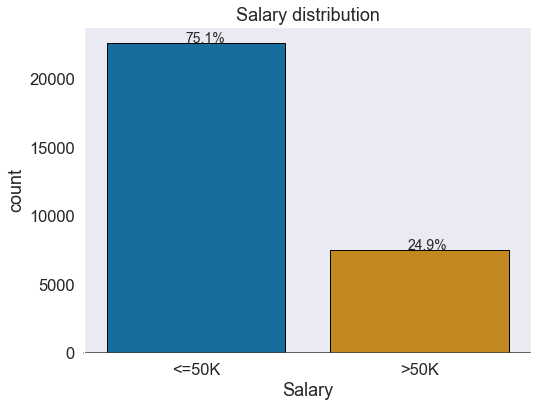

In [14]:
# Creating count plot depicting class label distribution in the data set
fig = plt.figure(figsize=(8,6))

ax = sns.countplot(x = adults_data_df['Salary'],data = adults_data_df, edgecolor=(0,0,0))
ax.axhline(0, color="k", clip_on=False)
ax.set(title='{} distribution'.format('Salary'))

total_count = len(adults_data_df['Salary'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_count)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 14)

plt.show()

**Observation**: This shows that the given data is heavily skewed towards low income group. 75% of the people are earning less than 50K and and only ~25% of the people are earning more than 50K

#### Methods to generate visualizations using violin plot, count plot, mosaic plot and heat map techniques for analysis:

In [15]:
# Function for building violin plots for the continuous attributes. 
def violin_plot_for_continuous_attributes(feature):
    ordered = adults_data_df.groupby('Salary').median().sort_values(feature, ascending=False).index 
    fig, ax = pyplot.subplots(figsize =(8, 6)) 
    sns.violinplot(ax = ax, y = adults_data_df[feature], x = adults_data_df['Salary'], order = ordered )
    ax.set(title='{} distribution'.format(feature))  

# Function for building count plots for the categorical attributes. 
def count_plot_for_categorical_attributes(feature):
    fig = plt.figure(figsize=(20,20)) 
    total = len(adults_data_df) 
    ax = sns.countplot(x = adults_data_df[feature], hue = adults_data_df['Salary'])
    ax.set(title='{} distribution'.format(feature))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')
    
    # Code block to display column percentages on the top.   
    for p in plt.gca().patches:
        height = np.nan_to_num(p.get_height(), 0)
        percentage = '{:.1f}%'.format(100 * height/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax.annotate(percentage, (x, y) , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',size = 15)

    plt.show()
    

# Function to create a mosaic plot for categorical attributes.
def mosaic_plot(column_name):
    contingency_table = pd.DataFrame.from_records(adults_data_df, columns=[column_name,'Salary'])
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,8))
    fig.subplots_adjust(hspace=.9)
    plt.rcParams['font.size'] = -10
    mosaic(contingency_table, [column_name, 'Salary'], ax=ax, axes_label=True, gap=0.007,label_rotation=90.0)
    ax.set(title='Mosaic plot of {} against Salary'.format(column_name))
    plt.show()
    
# Function to create a correlation heat map.
def corr_heat_map(df):
    corr_matrix= df.corr() #Calculate the correlation of the above variables
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(6.5, 5.5))
    ax.set_title('Heatmap - Salary Analysis')
    cmap = sns.color_palette("RdBu", 11)
    plt.rcParams['font.size'] = 10

    sns.heatmap(corr_matrix, mask=None, cmap=cmap, vmax=1, center=0, annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5})



### 2.2 Violin Plots for Analyzing continuous data

#### Age

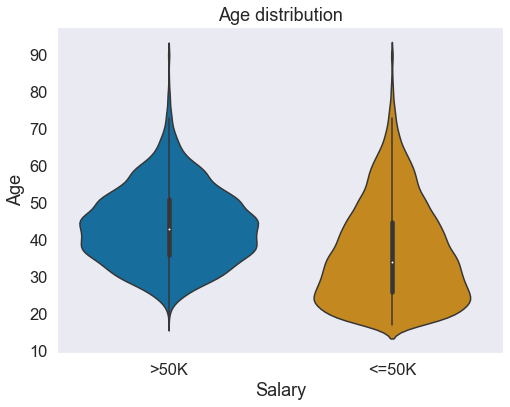

In [16]:
violin_plot_for_continuous_attributes('Age')

Observation: 
* It can be observed that the entries for class labels between the age 30 - 50 vary significantly. 
* There are greater chances of people with >50K income belonging to 40 to 50 years of age as compared to those younger than them. 
* Those in the age group 15-20, 70-90 have very little chance of earning greater than 50K.

#### Final Weight

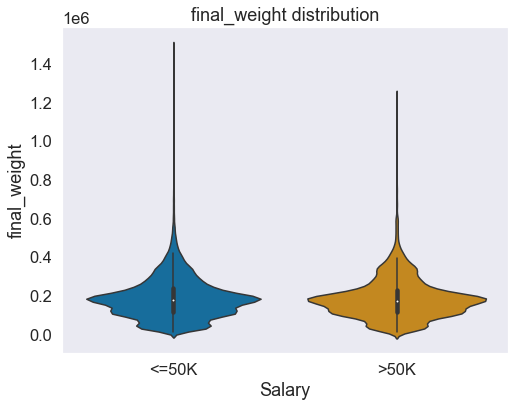

In [17]:
violin_plot_for_continuous_attributes('final_weight')

Observation:
* The final weight seems to have virtually no correlation to income as distribution of final weight for both the class label seems the same. 
* This attribute cannot be considered as an important factor for salary prediction.

#### Education Number

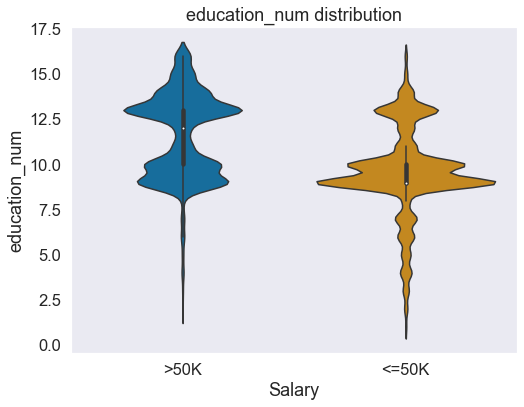

In [18]:
violin_plot_for_continuous_attributes('education_num')

Observation:
* It can be observed that there are higher chances of people with an education number between 7.5 - 10 belonging to <=50K category. 
* There are higher chances of people with an education number between 12.5 - 16 belonging to >50K category. 
* People with lower than 7.5 education number are more likely to have lower income.

#### Capital Gain

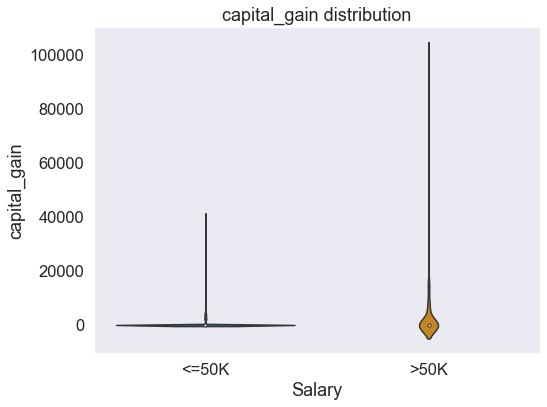

In [19]:
violin_plot_for_continuous_attributes('capital_gain')

Observation:
* It can be observed that majority of the data lies near 0 capital gain. 
* Capital gain is widely distributed for people earning >50K as compared to those earning <50K. 
* So, if a person is having higher capital gain, it is more likely that they will fall under >50K category.

#### Capital Loss

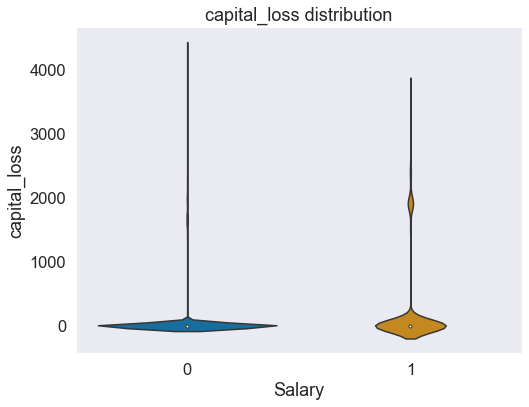

In [18]:
violin_plot_for_continuous_attributes('capital_loss')

Observation:
* It is evident from the above graph that capital loss samples are not as clearly split up into salary categories as capital gains, so this attribute may not be as valuable for salary class prediction.

#### Hours per Week

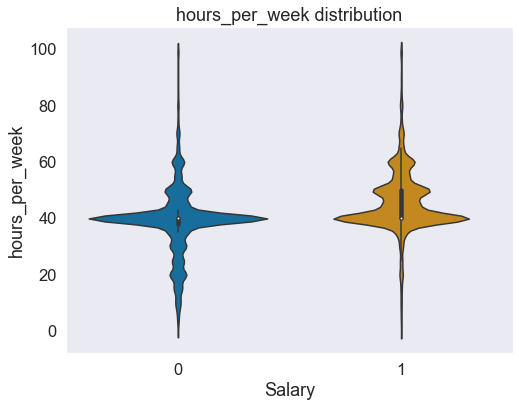

In [19]:
violin_plot_for_continuous_attributes('hours_per_week')

Observation:
* It can be observed from above graph that average working hours for the entire dataset is 40. 
* Those working fewer than 40 hrs are earning less than 50K. 
* There are greater chances of people working more than 40 hrs earning higher than 50K. 

### 2.3 Count and Mosiac Plots for Analyzing categorical data

#### Work Class

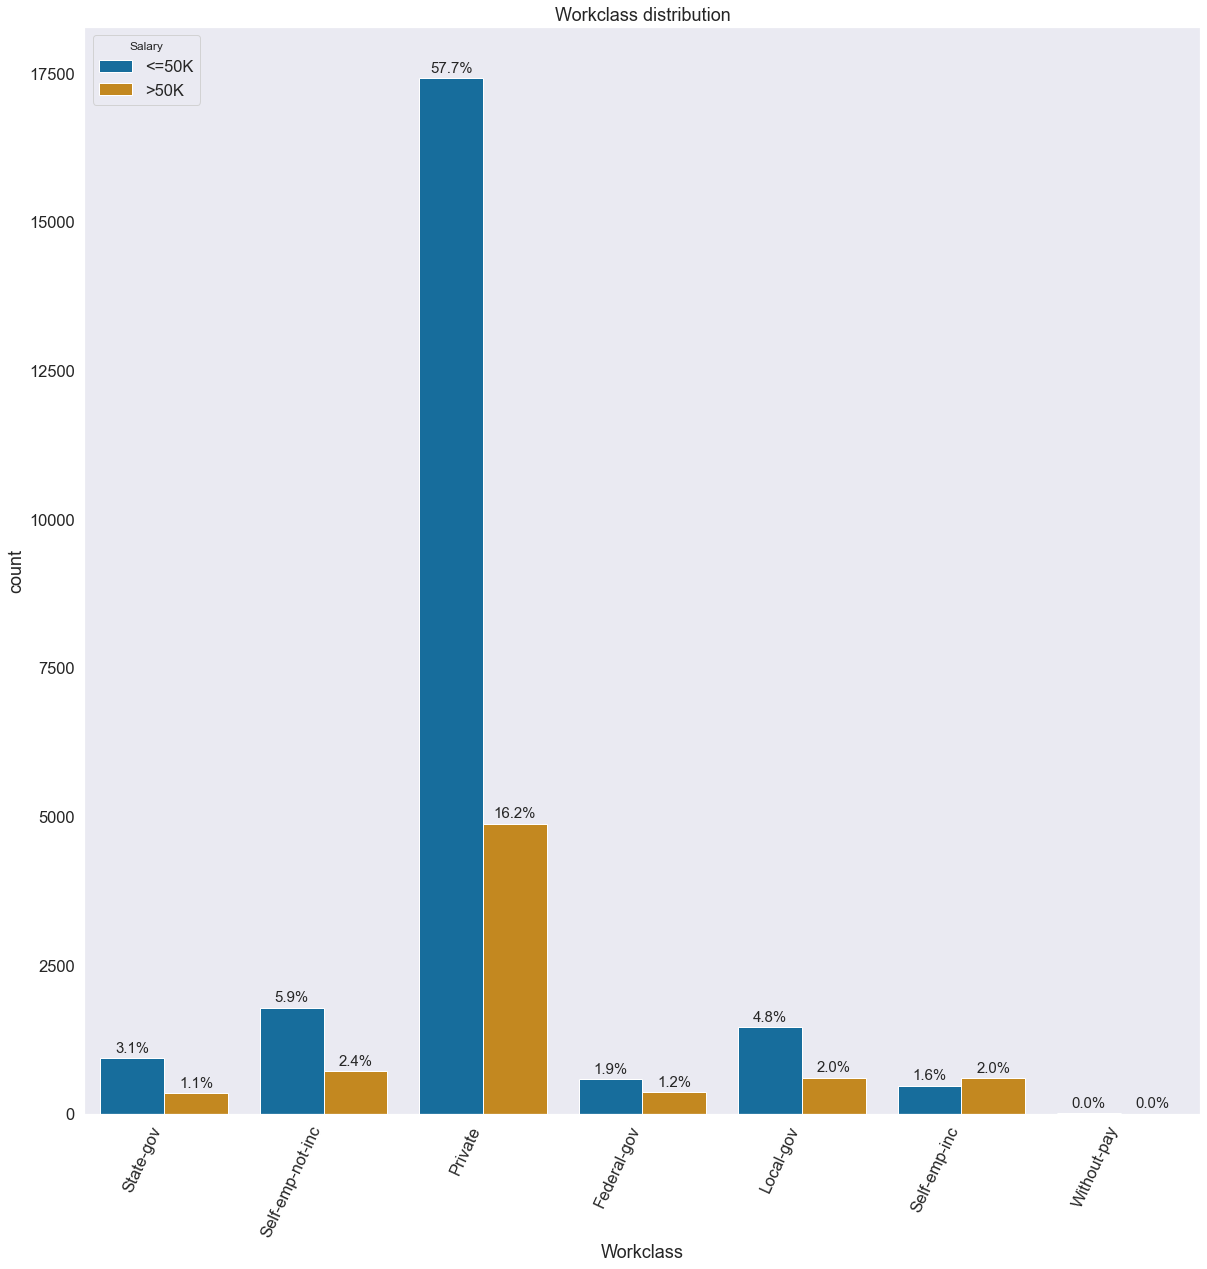

In [31]:
count_plot_for_categorical_attributes('Workclass')

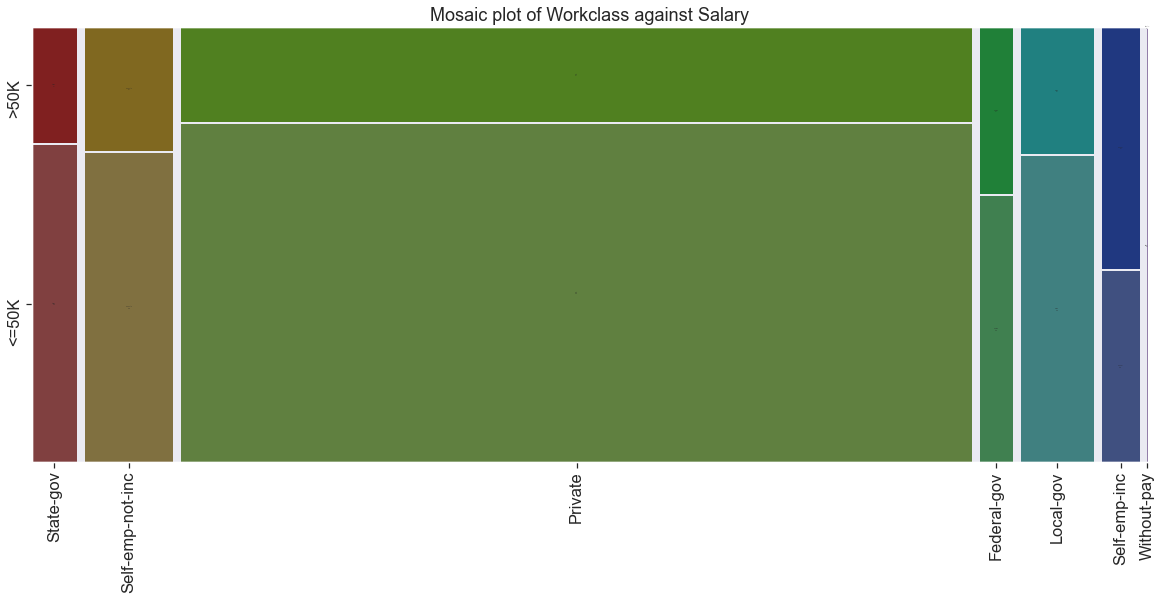

In [52]:
mosaic_plot('Workclass')

Observation:
* The private sector has the highest share of individuals making <=50K, but there are still large number of individuals making >50K.
* Federal/local/state government employees and self-employed (not incorporated) individuals also have a higher number of individuals making <=50k. 
* The only group that could be excluded from the prediction is self-employed (incorporated) individuals. Proportion of people belonging to both the classes is almost the same. 

#### Education

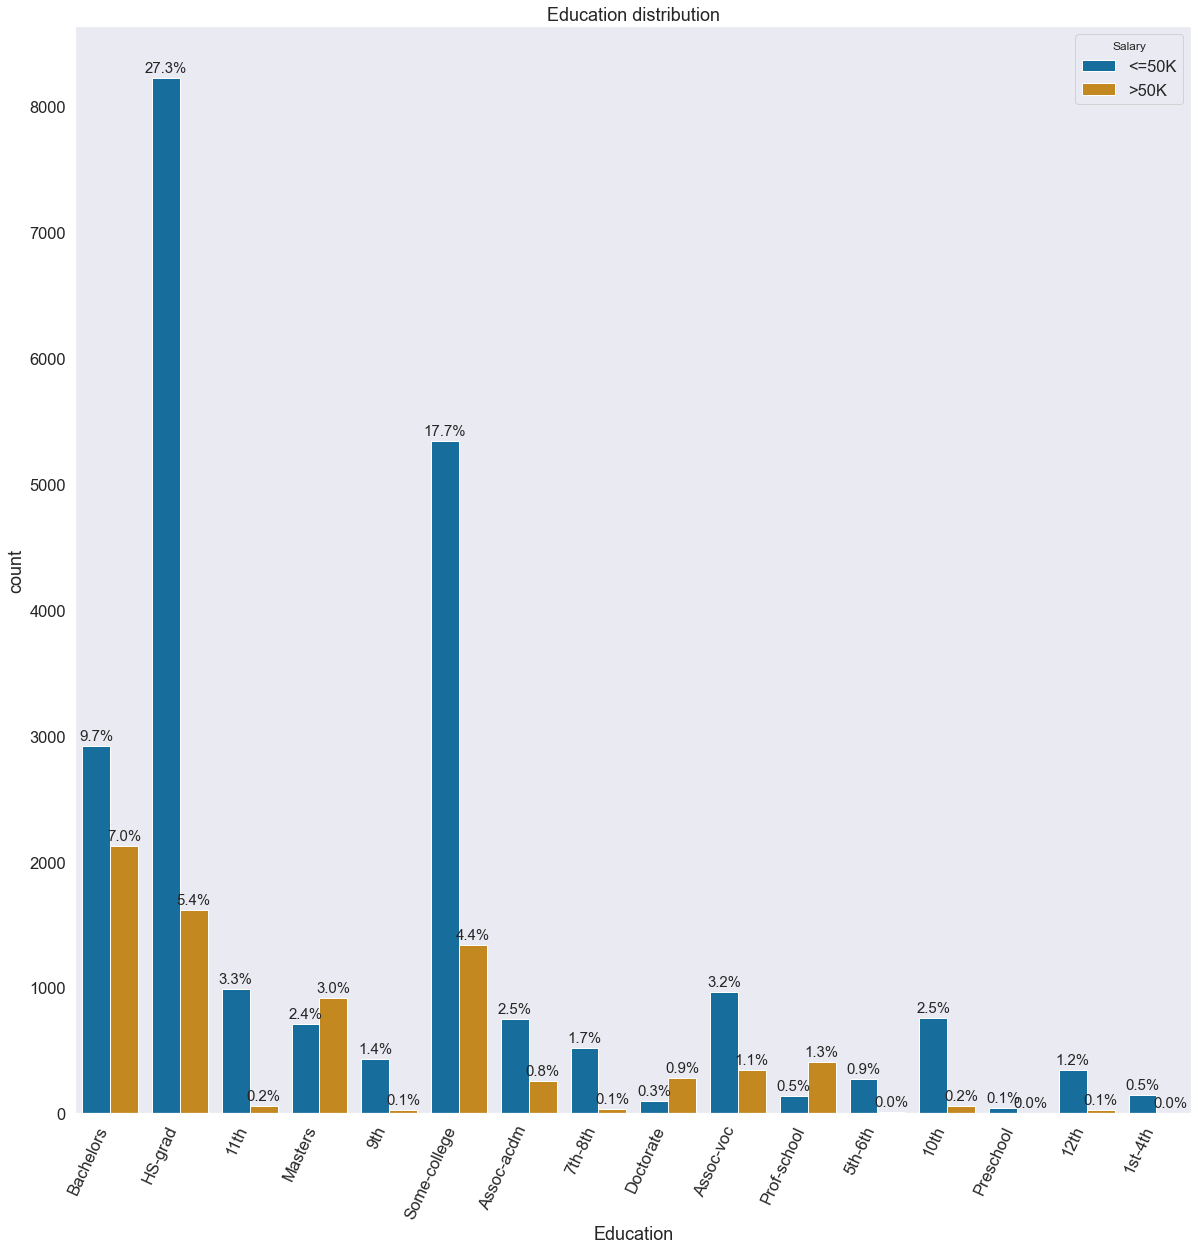

In [33]:
count_plot_for_categorical_attributes('Education')

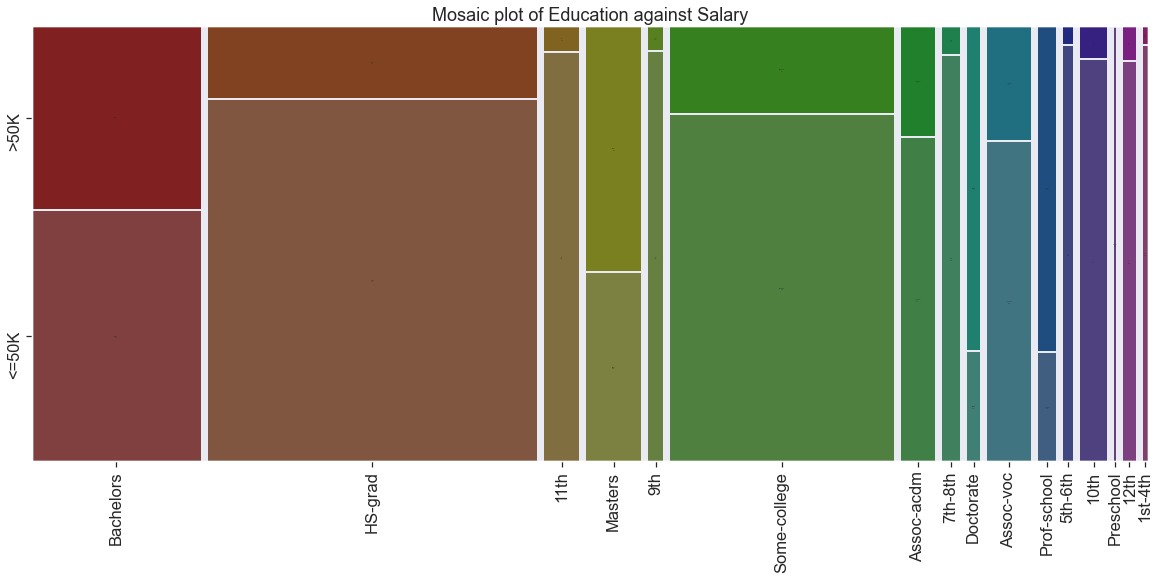

In [34]:
mosaic_plot('Education')

Observation:
* Most of the people in this dataset have only high school as their highest level of education. Only small portion are having doctoral degrees.
* Low income category mostly comprises of those people with the highest education of HS grad, Bachelors, some-college and other lower educated groups.
* Only those with masters and doctoral degree are having large proportion of high income individuals than low income individuals.

#### Marital Status

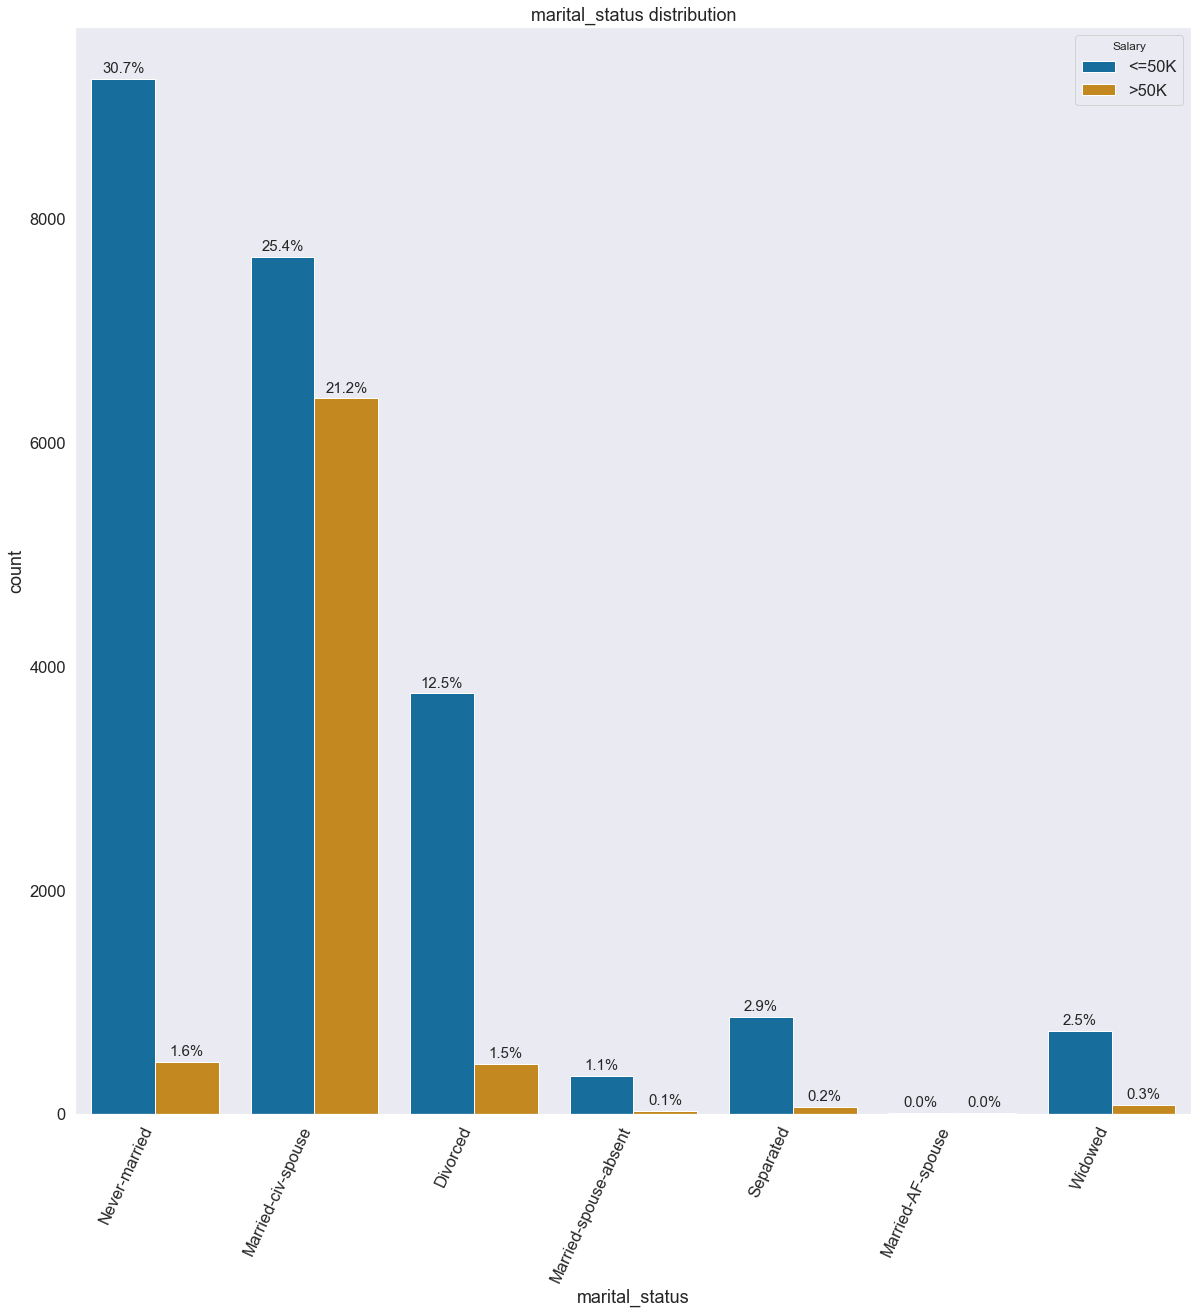

In [35]:
count_plot_for_categorical_attributes('marital_status')

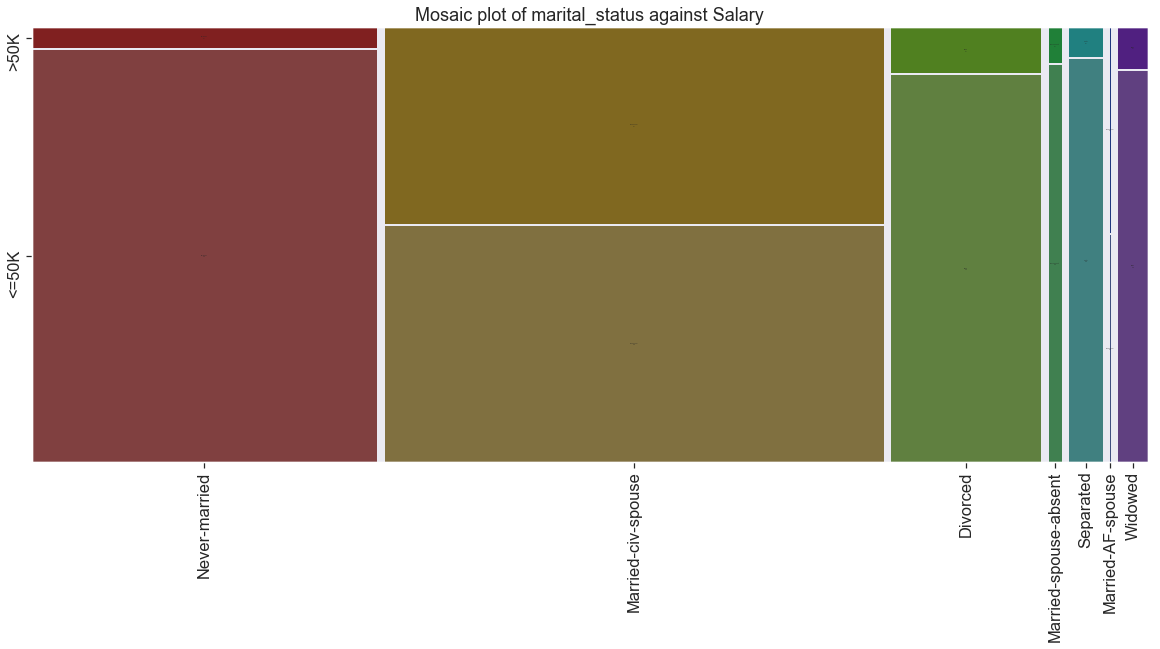

In [36]:
mosaic_plot('marital_status')

Observation:
* Married-AF-spouse appears to have a small sample size and therefore should probably be excluded from the income prediction analysis. 
* All categories except Married-civ-spouse are clearly weighted towards a <=50k salary, so marital status is a very good candidate for income prediction.


#### Occupation

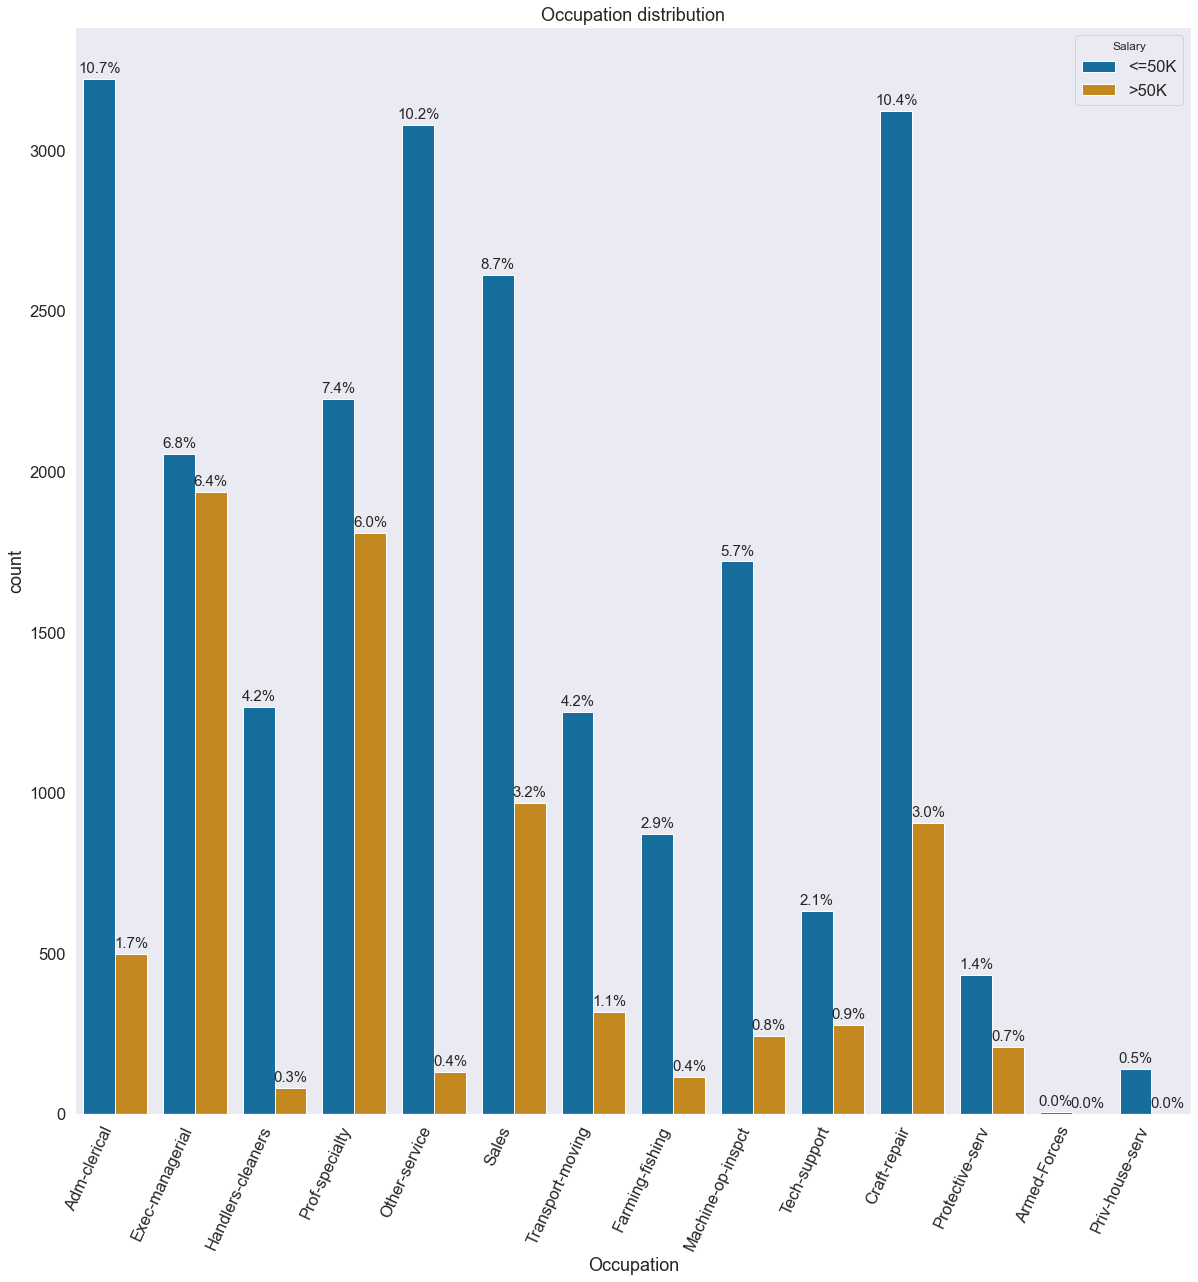

In [37]:
count_plot_for_categorical_attributes('Occupation')

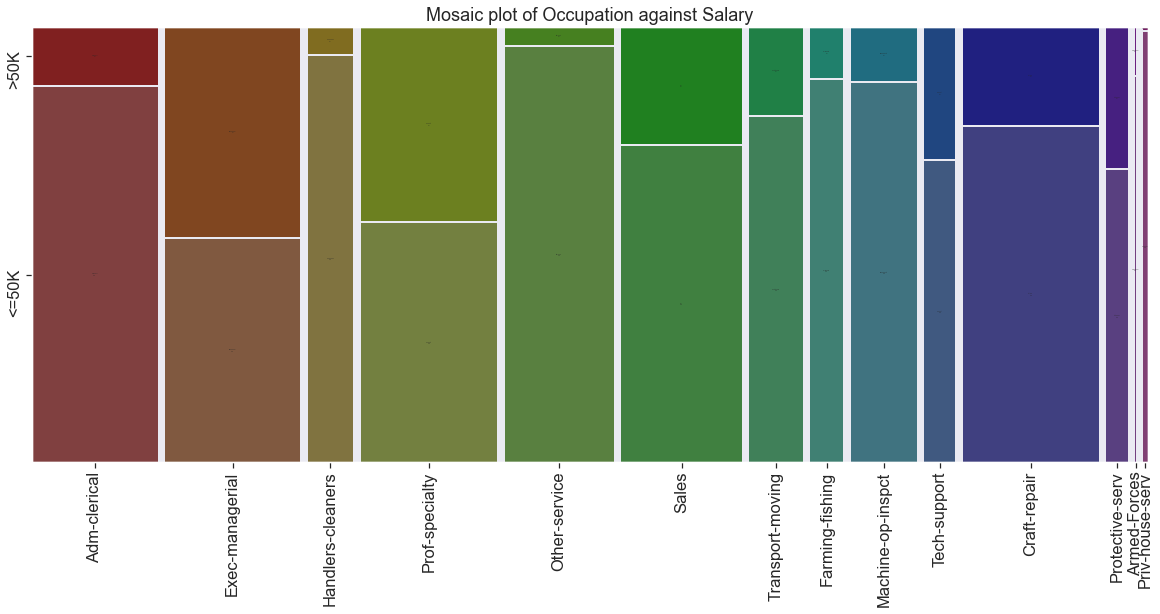

In [38]:
mosaic_plot('Occupation')

Observation:
* Those people who fall in the category of executive or prof - speciality roles are having higher incomes due to the higher rank of their occupation. 
* Rest all occupation groups are most likely to have income lower than 50K.
* It can be observed that kind of occupation plays role in the income and hence it can be a potential candidate for income prediction. 

#### Relationship

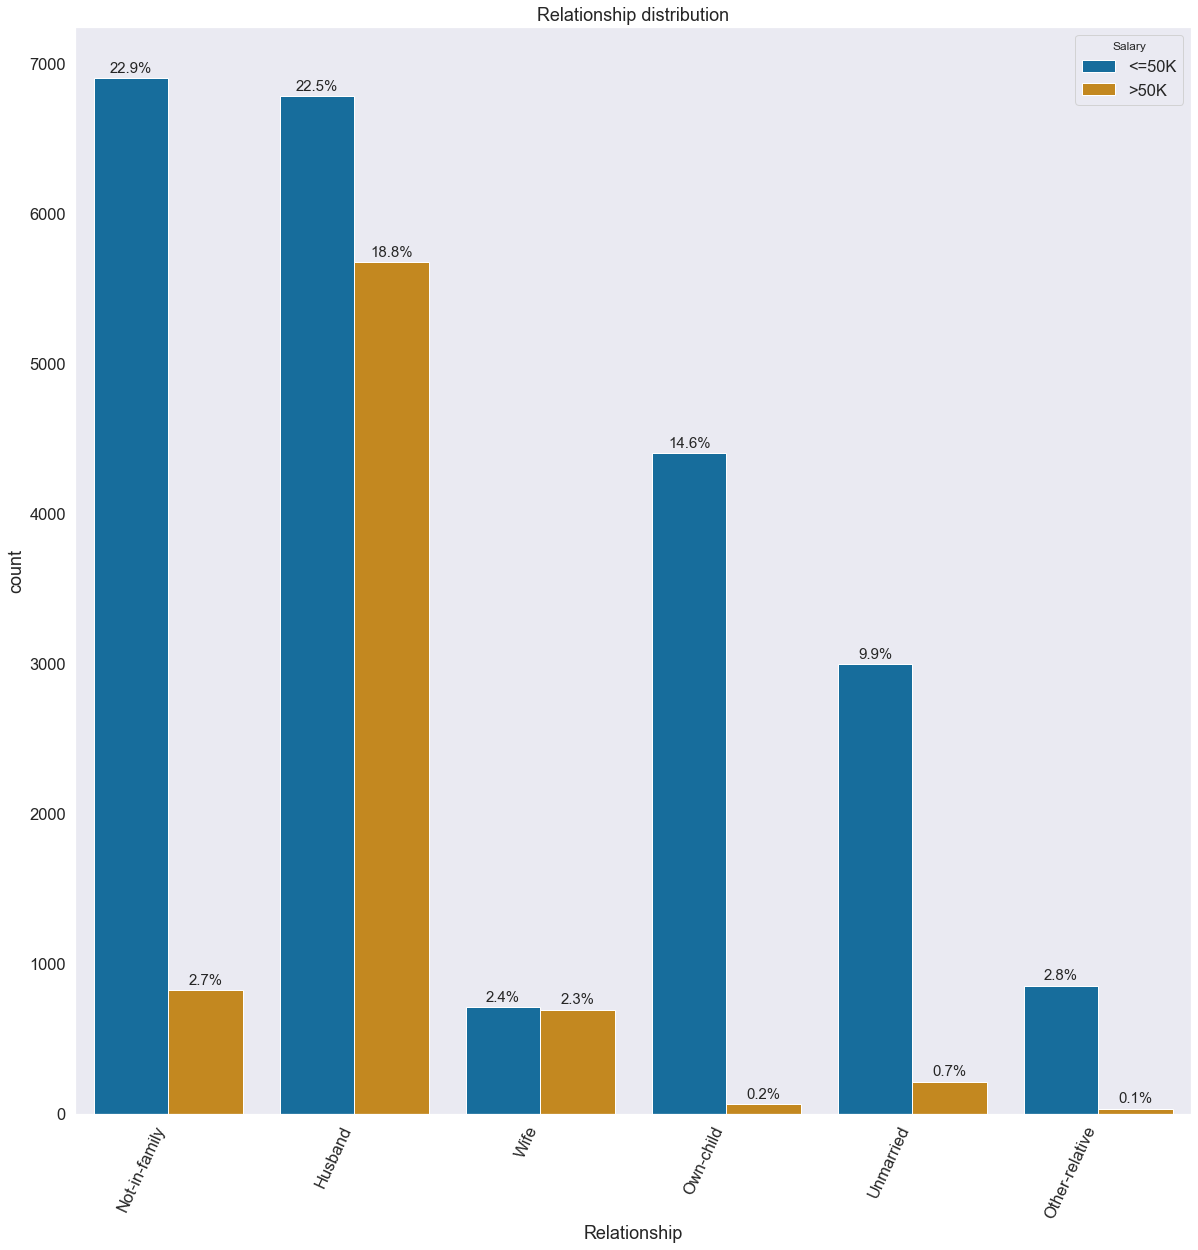

In [20]:
count_plot_for_categorical_attributes('Relationship')

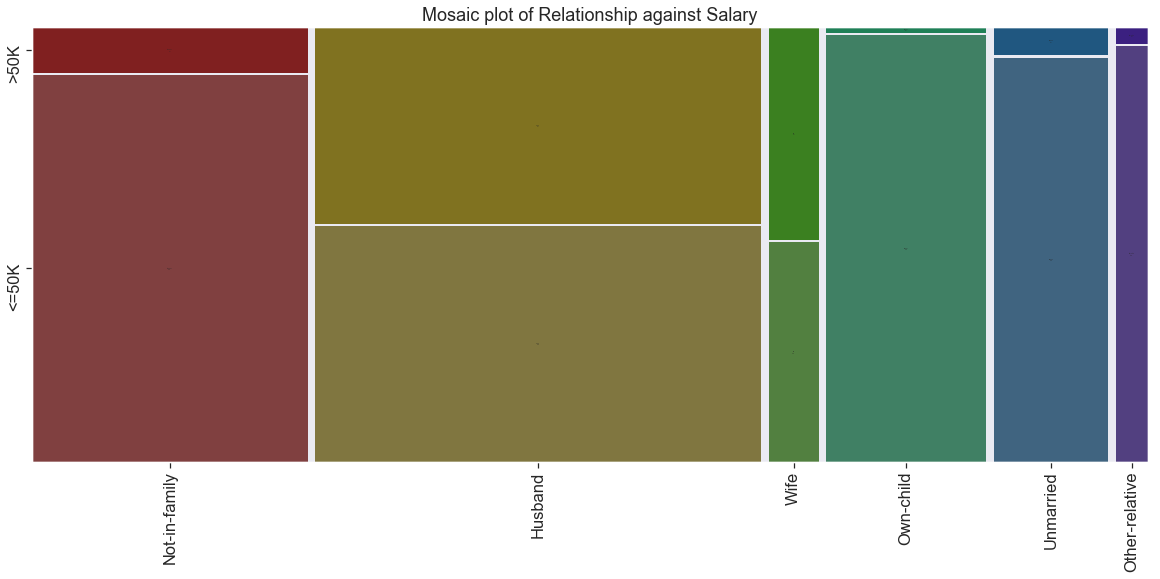

In [21]:
mosaic_plot('Relationship')

Observation:
* Except husband and wife, all other categories are making lower than 50K income. Probability of husband and wife falling in either class is almost similar. They don't provide much information.
* There is greater probability that those with their own child are making less money. 

#### Race

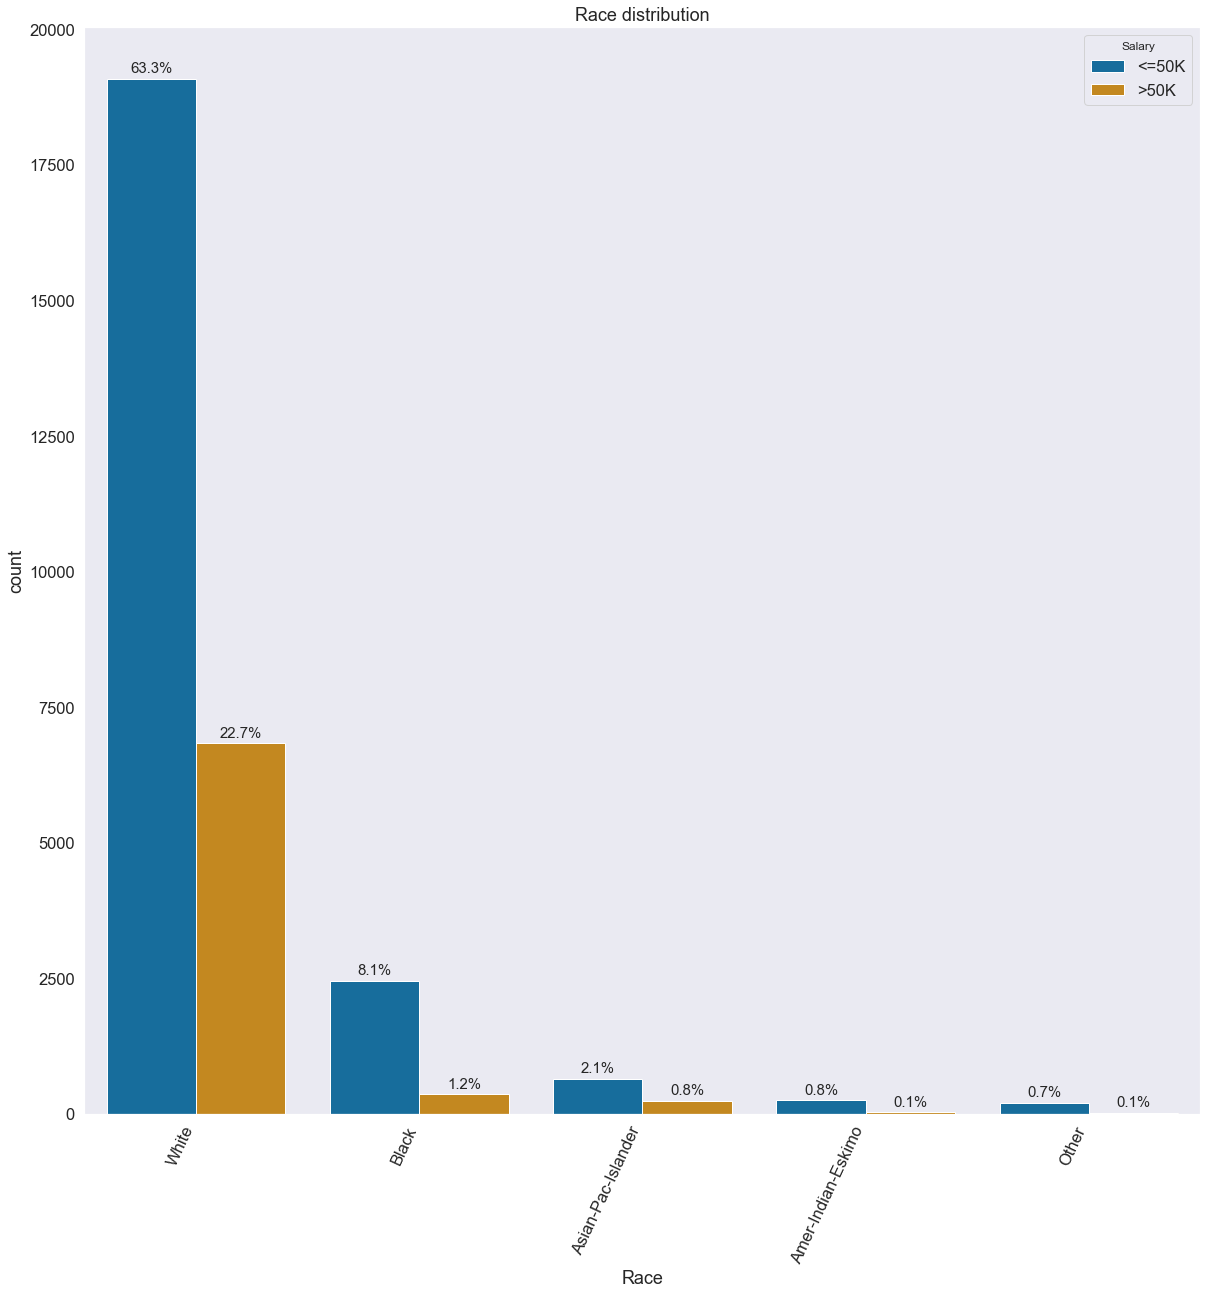

In [22]:
count_plot_for_categorical_attributes('Race')

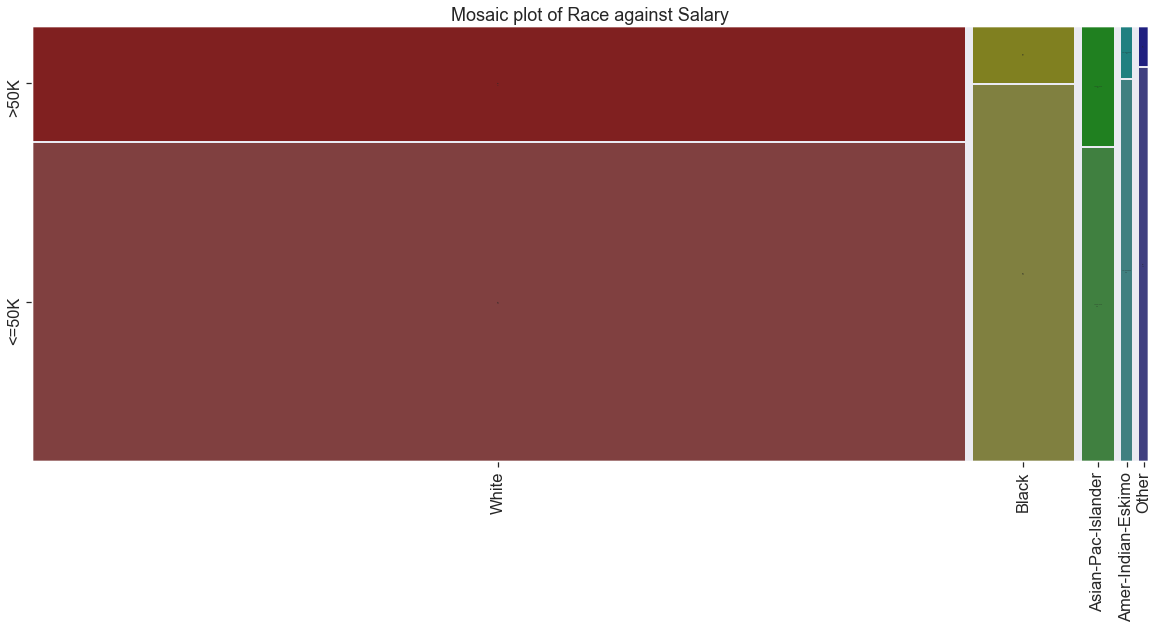

In [23]:
mosaic_plot('Race')

Observation:
* Almost all categories are weighted towards <=50k.
* "White" has the largest share of individuals making >50k, but this category also has a large share of individuals making <=50k.
* Race is not a good candidate to be considered as a factor for predicting income.

#### Sex

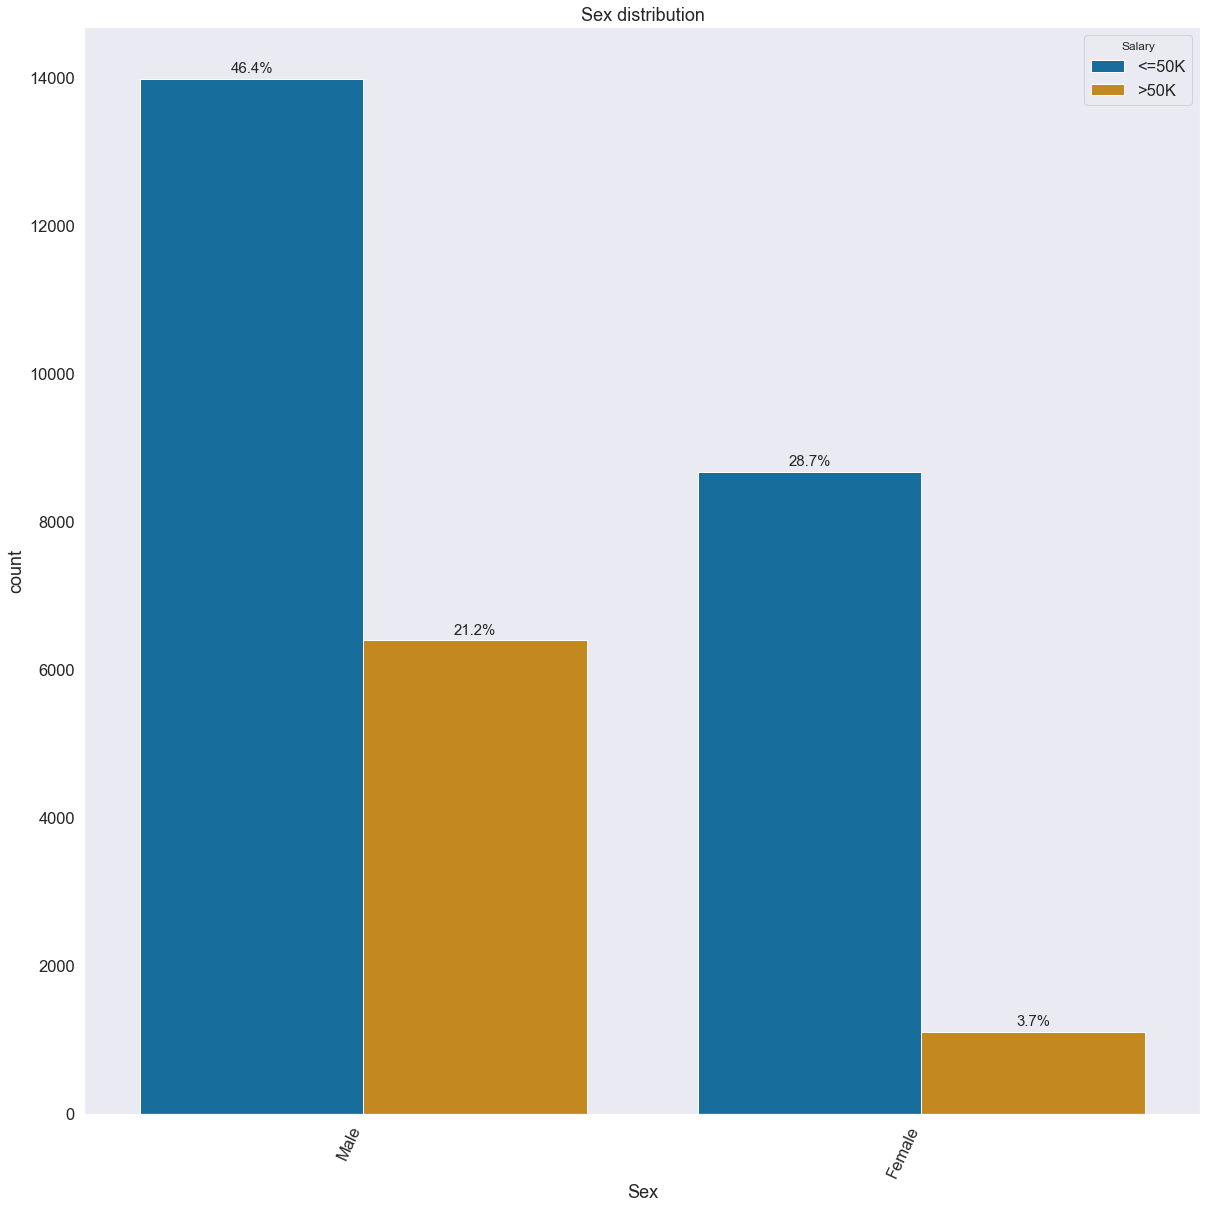

In [24]:
count_plot_for_categorical_attributes('Sex')

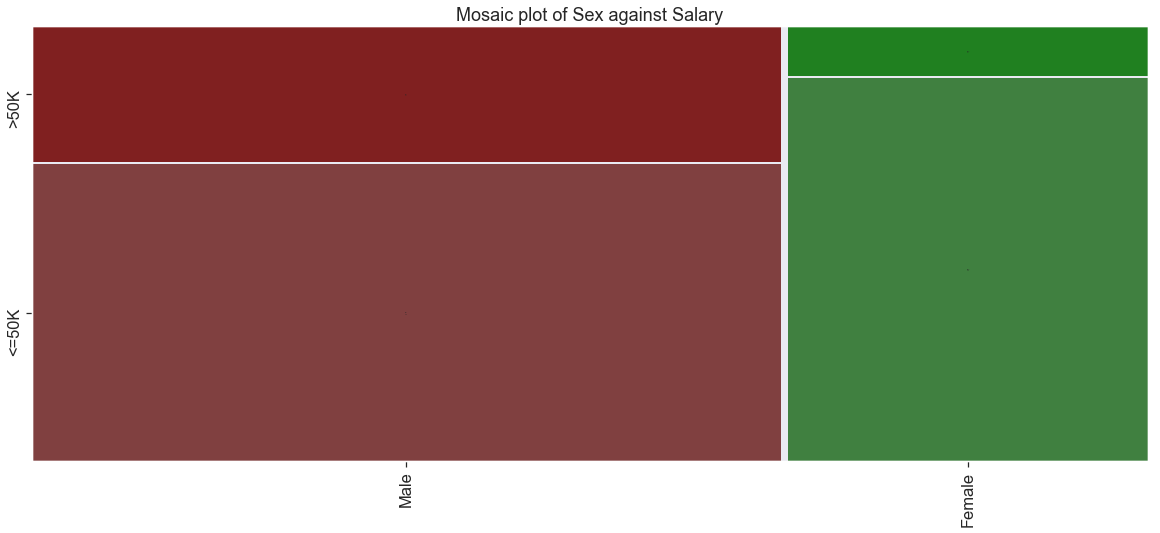

In [25]:
mosaic_plot('Sex')

Observation:
* Male constitutes a large number of individuals making >50k as compared to Female. 
* Hence probability of a male earning greater than $50K is higher than that of a female. 

#### Native Country

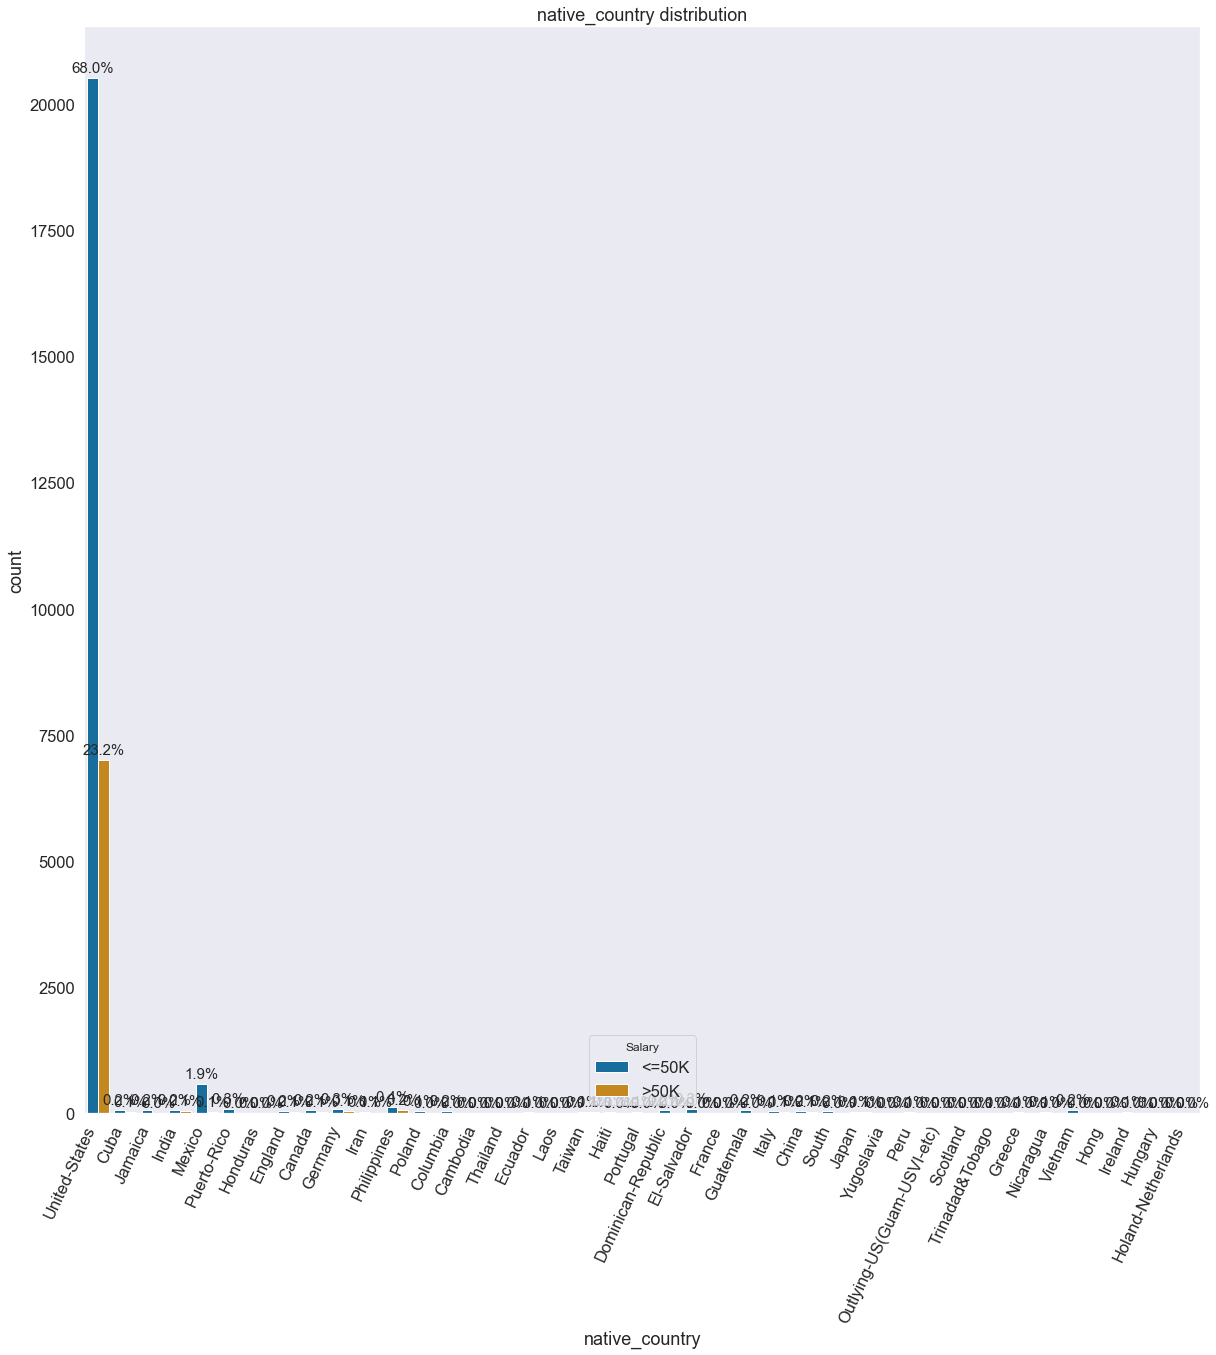

In [26]:
count_plot_for_categorical_attributes('native_country')

Observation:
* Majority of the people in the dataset belongs to the united states. Proportion of people earning less than 50K is higher than those earning greater than 50K.
* People belonging to remaining countries tend to have lower income. 


### 2.4 Useful Factors for Income Prediction

* Following factors have been identified to contribute in income prediction as these factors provide better insight of population distribution between two income groups i.e <= 50K and > 50K:
    * Age
    * Education
    * Marital Status
    * Occupation
    * Relationship
    * Capital Gain
    * Hours per Week

* Low income group of people can be targeted based on these factors for university enrollments.

## 3. Income Prediction

### 3.1 Splitting the income dataset into train and test set

In [27]:
identified_factors_df = pd.DataFrame.from_records(adults_data_cat_to_num_df, columns=['Age','Education','marital_status', 'Occupation','Relationship','capital_gain','hours_per_week', 'Salary'])
income_attributes = identified_factors_df[['Age','Education','marital_status', 'Occupation','Relationship','capital_gain', 'hours_per_week']]
income_class_label = identified_factors_df['Salary']

#splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(income_attributes, income_class_label, test_size = 0.33)

In [28]:
identified_factors_df.shape

(30162, 8)

In [29]:
X_train.shape

(20208, 7)

In [30]:
X_test.shape

(9954, 7)

In [31]:
classifier_performance = dict()

### 3.2 K-Nearest Neighbour Classifier

Choosing optimal value for number of neighbours,k in KNN classifier is very important. Hence we will perform the classification for different number of neighbours and store the corresponding accuracies in a list.

In [35]:
accuracy_list = []
accuracy_dict = {}
k_range = range(1,30)
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_predicted = knn_classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted)
    accuracy_list.append(accuracy)
    accuracy_dict[k] = accuracy

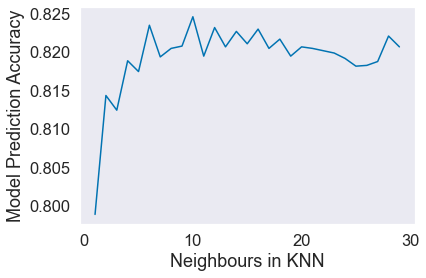

In [36]:
plt.plot(k_range,accuracy_list)
plt.xlabel('Neighbours in KNN')
plt.ylabel('Model Prediction Accuracy')
plt.rcParams['font.size'] = -10

The above graph shows that optimal number of K = 8

In [41]:
classifier_accuracy = round(accuracy_dict[8] * 100, 2)
classifier_performance["KNN Classifier"] = classifier_accuracy
print("The accuracy of K-Nearest Neighbour Classifier is {}%".format(classifier_accuracy))

The accuracy of K-Nearest Neighbour Classifier is 82.05%


### 3.3 Logistic Regression Classifier

In [43]:
logistic_regression_classifier = LogisticRegression(solver='liblinear', random_state=0)

logistic_regression_classifier.fit(X_train, y_train)
y_predicted = logistic_regression_classifier.predict(X_test)
classifier_accuracy = round(metrics.accuracy_score(y_test, y_predicted) * 100, 2)

classifier_performance["Logistic Regression Classifier"] = classifier_accuracy
print("The accuracy of Logistic regression model is {}%".format(classifier_accuracy))

The accuracy of Logistic regression model is 78.4%


### 3.4 Decision Tree Classifier

In [45]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)
y_predicted = decision_tree_classifier.predict(X_test)
classifier_accuracy = round(metrics.accuracy_score(y_test, y_predicted) * 100, 2)

classifier_performance["Decision Tree Classifier"] = classifier_accuracy
print("The accuracy of Decision Tree model is {}%".format(classifier_accuracy))

The accuracy of Decision Tree model is 80.24%


### 3.5 Naive Bayes Classifier

In [46]:
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)
y_predicted = naive_bayes_classifier.predict(X_test)
classifier_accuracy = round(metrics.accuracy_score(y_test, y_predicted) * 100, 2)

classifier_performance["Naive Bayes Classifier"] = classifier_accuracy
print("The accuracy of Naive Bayes model is {}%".format(classifier_accuracy))

The accuracy of Naive Bayes model is 78.26%


### 3.6 Random Forest Classifier

In [47]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)

random_forest_classifier.fit(X_train, y_train)
y_predicted = random_forest_classifier.predict(X_test)
classifier_accuracy = round(metrics.accuracy_score(y_test, y_predicted) * 100, 2)

classifier_performance["Random Forest Classifier"] = classifier_accuracy
print("The accuracy of Random Forest model is {}%".format(classifier_accuracy))

The accuracy of Random Forest model is 83.11%


### 3.7 Neural Network Classifier

In [48]:
neural_network_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

neural_network_classifier.fit(X_train, y_train)
y_predicted = neural_network_classifier.predict(X_test)
classifier_accuracy = round(metrics.accuracy_score(y_test, y_predicted) * 100, 2)

classifier_performance["Neural Network Classifier"] = classifier_accuracy
print("The accuracy of Neural Network model is {}%".format(classifier_accuracy))

The accuracy of Neural Network model is 77.12%


### 3.8 Classification Models Performance Comparison

In [56]:
classifiers_df = pd.DataFrame(list(classifier_performance.items()),columns = ['Classifier','Accuracy, %']) 
classifiers_df

,Classifier,"Accuracy, %"
0,KNN Classifier,82.05
1,Logistic Regression Classifier,78.40
2,Decision Tree Classifier,80.24
3,Naive Bayes Classifier,78.26
4,Random Forest Classifier,83.11
5,Neural Network Classifier,77.12


## Conclusion

* We identified Age, Education, Marital Status, Occupation, Relationship, Capital gain and Hours per week out of total 14 attributes as important factors for predicting income.
* We developed various machine learning classification models to income prediction based on these factors. The accuracy of all the model lies between 77 - 83%.
* Hence, based on the identified factors and classification models, we can target the people earning less than 50K to enroll into college for further education.  
